In [1]:
from matplotlib import pyplot as plt
import os
import pandas as pd
from utils.denoiser import *
from utils.enhancer import *
from utils.detector import *
from utils.extractor import *

## Test specifications

In [6]:
file_path = 'YOUR FILE PATH'
technique = 'gaussian'
method = 'q1'
threshold = 10
flip = True

### Run test

In [7]:
def load_image(file_path):
    """
    Load an image from a file and return it as a numpy array.
    :param file_path: The path to the image file.
    :return: The image as a numpy array.
    """

    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # image = np.asarray(image, dtype=np.float32) / 255.0  # Convert to float32 and normalize
    # image = np.expand_dims(image, axis=-1)  # Add channel dimension
    # image = np.expand_dims(image, axis=0)  # Add batch dimension
    return np.asarray(image)

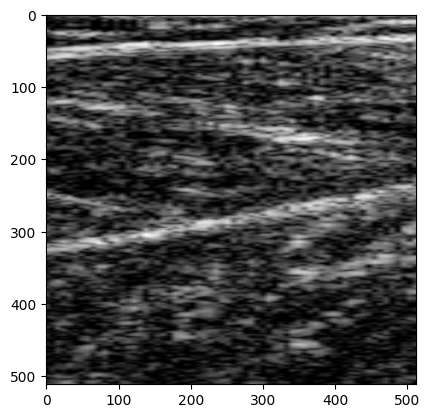

In [8]:
image = load_image(file_path)
if flip:
    image = cv2.flip(image, 1)

plt.imshow(image, cmap='gray')
plt.show()

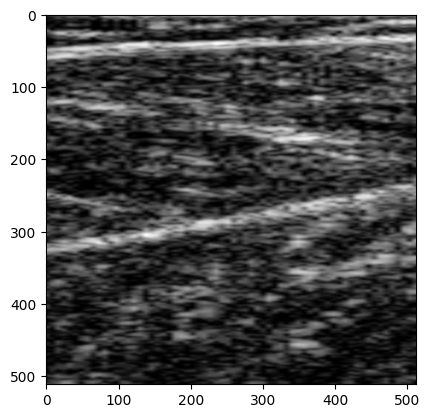

In [9]:
# if technique == 'bilateral':
#     denoised_image = bilateral_filter(image)
# elif technique == 'gaussian':
#     denoised_image = gaussian_smooth(image)
# elif technique == 'nlm':
#     denoised_image = nlm_denoise(image)
# elif technique == 'pooling':
#     denoised_image = layered_average_pooling(image)
# elif technique == 'n2n':
#     denoised_image = zsnoise2noise(image)
# else:
#     raise ValueError('Invalid denoising technique.')
denoised_image = denoise_image(image, technique)
plt.imshow(denoised_image, cmap='gray')
plt.show()

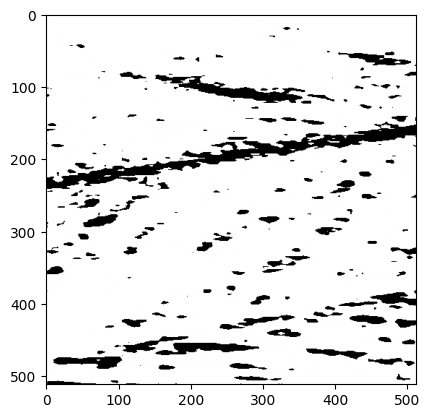

In [10]:
enhanced_image = isolate_intensity(denoised_image, method)
plt.imshow(enhanced_image, cmap='gray')
plt.show()

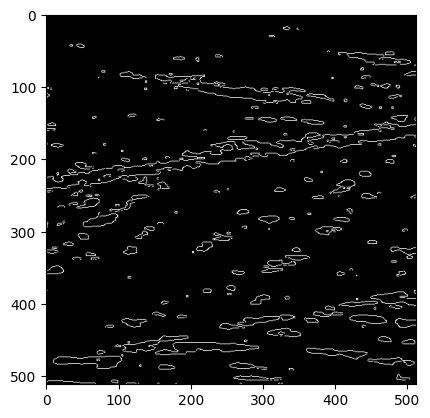

In [11]:
if technique == 'n2n':
    enhanced_image = np.clip(enhanced_image, 0, 1)
    enhanced_image = (enhanced_image * 255).astype(np.uint8)
edges = edge_detection(enhanced_image)
plt.imshow(edges, cmap='gray')
plt.show()

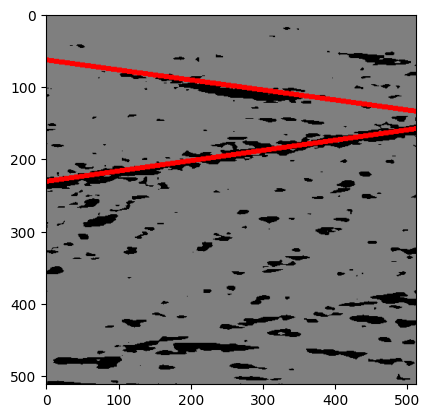

In [12]:
aponeuroses_image, line_deep, line_sup = hough_transform(edges, threshold=threshold, visualise=enhanced_image)
plt.imshow(aponeuroses_image, cmap='gray')
plt.show()

In [13]:
get_quadrilateral_coordinates(line_deep, line_sup, final_width=edges.shape[1], initial_width=image.shape[1])

[[0, 63], [512, 134], [512, 158], [0, 231]]